<H1> CUNY622 HW Week 8</H1>

The text analyzed was retrieved form the Open American National Corpus (OANC).  It is available from this link:
http://www.anc.org/data/oanc/download/

The download from that site is a zip of hundreds of files.  The file chosen was a novel (unheard of) in the "eggan" folder.  


In [25]:
import io
import nltk
import re



path = 'C:/school/cuny/620/hwwk8/eggan/'
fName = 'TheStory.txt'

text = None

#with open (path + fName, 'r', encoding = 'utf-8') as f:
f = io.open(path + fName, mode="r", encoding="utf-8")
text = f.read()
f.close()

# replace single apostrophe (i.e., the mark denoting posessiveness), b/c regex below makes single words of 's'
text = text.replace('\'', '')

#replace all non-alpha characters with a space, essentially removing all punctuation and numbers (numbers indicating
#chapters or subchapters), so we are left with just "words"
text = re.sub('[^a-zA-Z]+', ' ', text)

#make all lower case, as we want to have The and the be considered one word, not two
text = text.lower()


<H2>Unique Words (Question 3)</H2>
The text contiains a little over 61k words, with a total of about 12k unique words.

Any alpha text is considered a word.  Numbers were not considered words.  Words were all made lower case so words with the same letter butdifferent (original) capitalization are considered one word.  

In [26]:
token_text = nltk.word_tokenize(text)
print("The number of words in the text is: " + str(len(token_text)))
print("The number of uniqure words in the text is: " + str(len(set(token_text))))

The number of words in the text is: 61148
The number of uniqure words in the text is: 12022


In [27]:
fDist = nltk.FreqDist(token_text)
uniqueWords = len(set(token_text))
commonWords =  fDist.most_common()

countInstances = commonWords[0][1]
i = 1
while(countInstances < uniqueWords):
    countInstances += commonWords[i][1]
    i +=1

print("The number of words that makes up half the words in the text is only: " + str(i))
 
topWords = []
[topWords.append(commonWords[i][0]) for i in range(0,8)]
print('The words are: ' + ', '.join(topWords))


The number of words that makes up half the words in the text is only: 8
The words are: the, of, and, to, in, a, is, that


<H2>200 Highest Frequency Words (Question 4)</H2>

In [28]:
fDist = nltk.FreqDist(token_text)
mostCommon  = fDist.most_common(200)
mostCommon

[(u'the', 3532),
 (u'of', 1824),
 (u'and', 1820),
 (u'to', 1561),
 (u'in', 1181),
 (u'a', 1179),
 (u'is', 702),
 (u'that', 566),
 (u'for', 486),
 (u'he', 450),
 (u'i', 435),
 (u'with', 407),
 (u'as', 400),
 (u'on', 395),
 (u'are', 377),
 (u'you', 341),
 (u'we', 340),
 (u'his', 340),
 (u'was', 320),
 (u'be', 310),
 (u'by', 308),
 (u'from', 301),
 (u'it', 286),
 (u'not', 285),
 (u'at', 270),
 (u'this', 256),
 (u'but', 242),
 (u'they', 240),
 (u'have', 236),
 (u'all', 232),
 (u'her', 221),
 (u'an', 212),
 (u'or', 198),
 (u'their', 194),
 (u'our', 191),
 (u'who', 161),
 (u'what', 157),
 (u'were', 151),
 (u'can', 149),
 (u'has', 143),
 (u'no', 143),
 (u'its', 142),
 (u'my', 141),
 (u'will', 141),
 (u'she', 131),
 (u'me', 130),
 (u'one', 129),
 (u'us', 122),
 (u'more', 119),
 (u'which', 119),
 (u'now', 118),
 (u'so', 115),
 (u'about', 113),
 (u'out', 113),
 (u'up', 111),
 (u'had', 108),
 (u'like', 108),
 (u'into', 107),
 (u'other', 106),
 (u'your', 104),
 (u'here', 98),
 (u'if', 97),
 (u'the

<H2>Relatively Frequencies (Question 5)</H2>

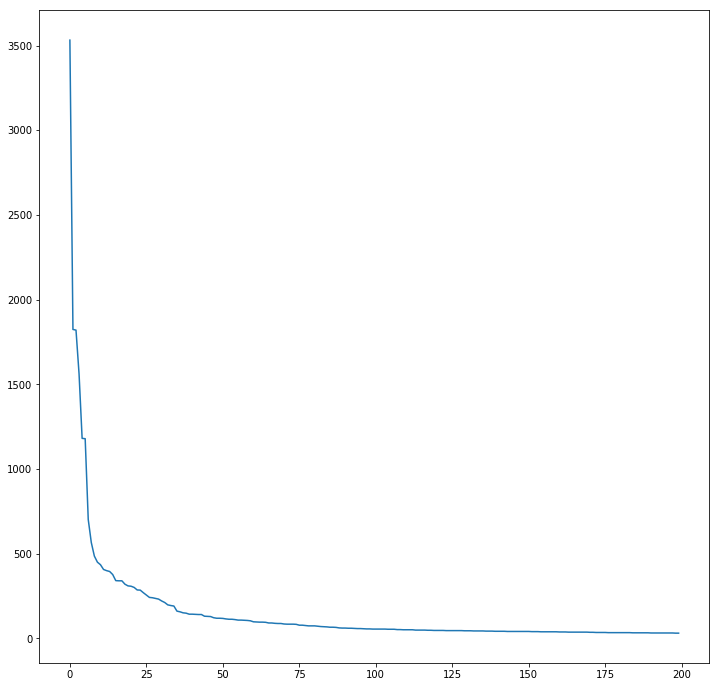

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
freq = []
[freq.append(wordFreq[1]) for wordFreq in mostCommon];
plt.plot(range(0,200), freq)
plt.show()

<H2>Zipf's Law (Question 6)</H2>

Zipf's law states that a words frequency is inversely proportional to its rank, i.e., 1/n where n is rank.

Below we graph the frequency of words from our text along with a graph of Zipf's law with 1/1 as 3532, which is the highest frequency word ('the') from the text.

As we see, the plots mathc pretty closely so that our text does indeed follow Zipf's law.

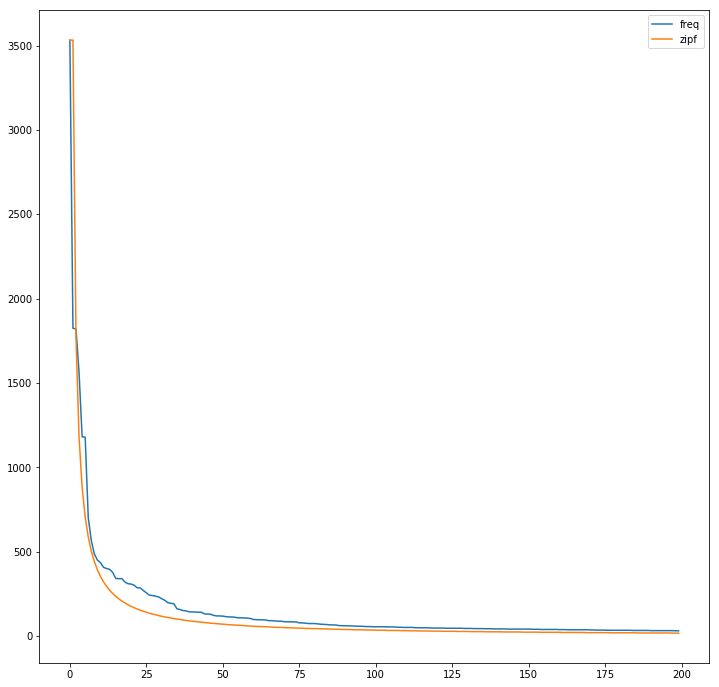

In [30]:
#plot with second zipf's law second line 
import numpy as np
import pandas as pd

zipf = []
zipf.append(freq[0])
[zipf.append(freq[0]/i) for i in range (1,200)];

combined = pd.DataFrame(list(zip(freq,zipf)), columns = ['freq','zipf'])
combined.plot()



#combined = pd.DataFrame('y' : y, 
#combined =  np.hstack((y, zipY)).T
#plt.plot(range(0,200), combined)
#plt.plot((np.asarray(y), np.asanyarray(zipY)))

<H2>Question 7, frequency of words</H2>
It would be diffcult to answer with certainly how the frequency of words in this text varies from "all words in all corpora" without the knowledge of what is that 'all corpora' master text.  Some generalities can be assumed.  The text analyzed was a work of fiction, and as such it would vary from lots of other sources, in ways such as the following:

* It would have far fewer "large" words than scientific texts.
* It is more formal than texts such as personal emails and chats, having less "made up words, aka 'lol' and 'brb'
* It is likely less formal than journalistic texts
* It would have more dialogue type words, e.g., said, supposed, yelled, whispered, and so forth


